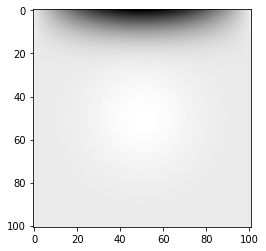

In [10]:
import numpy as np
from pylab import imshow, gray, show
    
def main():
    #define constants
    M = 100    #number of square on a side
    tol = 1e-3    #tolerance of solution
    
    f = lambda x,y : -20 * np.exp(- ((x - .5)**2 + (y - .5)**2) / .05)
    
    #create arrays to hold potential values
    phi = np.zeros ([M+1,M+1], float)
    #initialize boundary condition
    x = np.linspace(0,1,M+1)
    h = x[1] - x[0]
    phi[0,:] = -np.sin(np.pi * x)
    phi_prime = np.empty ([M+1, M+1], float)
    
    #main loop
    delta = 1.0   #arbitrary val, specify the difference
    while (delta > tol):
        for i in range (M + 1):
            for j in range (M + 1):
                if (i == 0) or (i == M) or (j == 0) or (j == M):
                    phi_prime[i,j] = phi[i,j]    #on the boundary, we do not change the values
                else:  # avg of 4 surrounding values
                    phi_prime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1]) / 4 - h**2 * f(i/M,j/M) / 4
                
        #calculate max difference from old values
        diff = abs (phi - phi_prime)
        delta = np.amax (diff)
        
        #swap two arrays around
        phi, phi_prime = phi_prime, phi
    
    #make a plot
    imshow (phi)
    gray()
    show()

main()
                